Q1) Delivery_time -> Predict delivery time using sorting time.

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time.csv


In [3]:
delivery_time=pd.read_csv('delivery_time.csv')
delivery_time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
delivery_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
delivery_time.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


PLOTTING DISTRIBUTION PLOT:

Here both datas are highly correlated and no null vaules too.

<ipython-input-6-0ffa88ae8123>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delivery_time['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

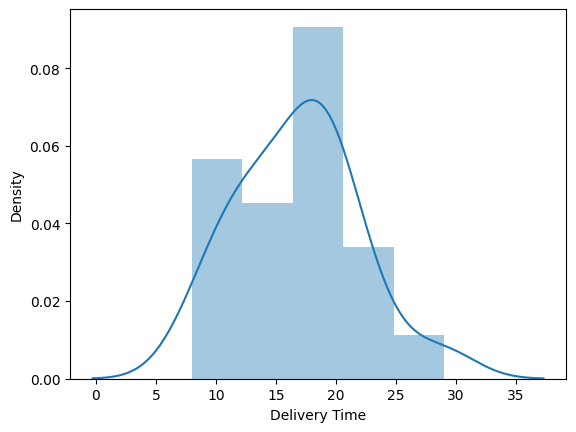

In [6]:
import seaborn as sns
sns.distplot(delivery_time['Delivery Time'])

<ipython-input-7-8b9e0ef9d4e3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delivery_time['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

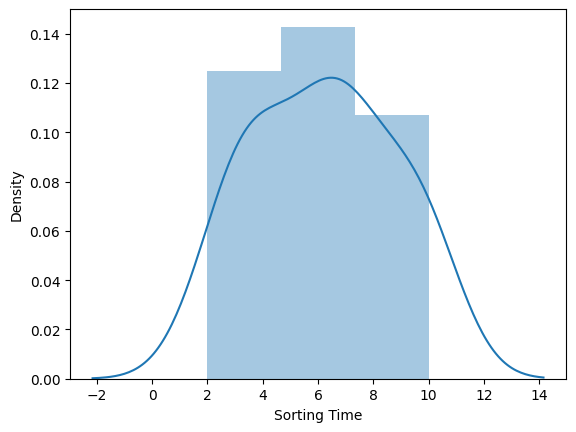

In [7]:
import seaborn as sns
sns.distplot(delivery_time['Sorting Time'])

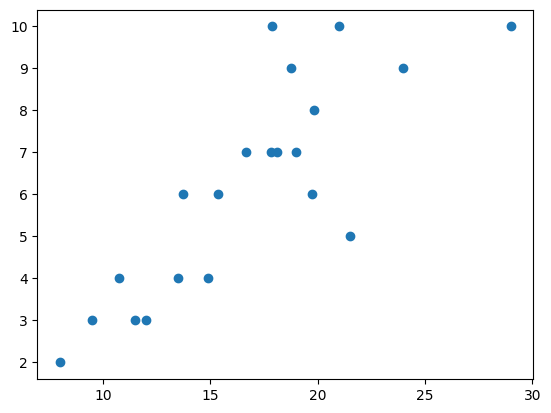

In [8]:
import matplotlib.pyplot as plt
plt.scatter(delivery_time['Delivery Time'],delivery_time['Sorting Time'])

In [9]:
delivery_time.rename(columns={'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},inplace=True)
delivery_time

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [10]:
import statsmodels.formula.api as smf
model=smf.ols("Delivery_Time~Sorting_Time",data=delivery_time).fit()

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

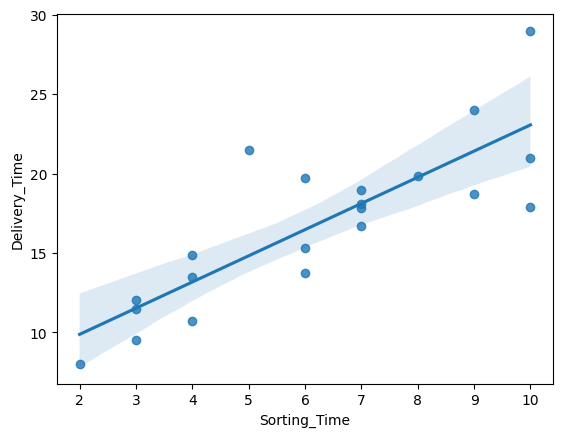

In [11]:
sns.regplot(x='Sorting_Time',y="Delivery_Time",data=delivery_time)

In [12]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [13]:
model.tvalues

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64

In [14]:
model.pvalues

Intercept       0.001147
Sorting_Time    0.000004
dtype: float64

In [15]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [16]:
import numpy as np
RMSE=np.sqrt(((model.resid)**2).mean())
RMSE

2.7916503270617654

Predicting Values

In [17]:
delivery_time['Model_Predicted_values']=model.fittedvalues
delivery_time['Error']=model.resid
delivery_time

,Delivery_Time,Sorting_Time,Model_Predicted_values,Error
0,21.00,10,23.072933,-2.072933
1,13.50,4,13.178814,0.321186
2,19.75,6,16.476853,3.273147
3,24.00,9,21.423913,2.576087
4,29.00,10,23.072933,5.927067
5,15.35,6,16.476853,-1.126853
6,19.00,7,18.125873,0.874127
7,9.50,3,11.529794,-2.029794
8,17.90,10,23.072933,-5.172933
9,18.75,9,21.423913,-2.673913


In [18]:
delivery_time['Error_Squared_value']=delivery_time['Error']**2
delivery_time

,Delivery_Time,Sorting_Time,Model_Predicted_values,Error,Error_Squared_value
0,21.00,10,23.072933,-2.072933,4.297051
1,13.50,4,13.178814,0.321186,0.103161
2,19.75,6,16.476853,3.273147,10.713489
3,24.00,9,21.423913,2.576087,6.636224
4,29.00,10,23.072933,5.927067,35.130124
5,15.35,6,16.476853,-1.126853,1.269798
6,19.00,7,18.125873,0.874127,0.764098
7,9.50,3,11.529794,-2.029794,4.120062
8,17.90,10,23.072933,-5.172933,26.759235
9,18.75,9,21.423913,-2.673913,7.149811


In [19]:
Data=pd.Series([2,4,6,8,10])
Dataprediction=pd.DataFrame(Data,columns=['Sorting_Time'])
Dataprediction

,Sorting_Time
0,2
1,4
2,6
3,8
4,10


In [20]:
Dataprediction['New_Predicted_DeliveryTime']=model.predict(Dataprediction)
model.predict(Dataprediction)

0     9.880774
1    13.178814
2    16.476853
3    19.774893
4    23.072933
dtype: float64

In [21]:
Dataprediction['New_Predicted_DeliveryTime']=model.predict(Dataprediction)
Dataprediction

,Sorting_Time,New_Predicted_DeliveryTime
0,2,9.880774
1,4,13.178814
2,6,16.476853
3,8,19.774893
4,10,23.072933


Tranformations:

1) Log Transformation

In [22]:
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time (1).csv


In [24]:
delivery_time=pd.read_csv('delivery_time.csv')
delivery_time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [25]:
import numpy as np
log_data= np.log1p(delivery_time)
log_data

,Delivery Time,Sorting Time
0,3.091042,2.397895
1,2.674149,1.609438
2,3.032546,1.945910
3,3.218876,2.302585
4,3.401197,2.397895
5,2.794228,1.945910
6,2.995732,2.079442
7,2.351375,1.386294
8,2.939162,2.397895
9,2.983153,2.302585


<ipython-input-26-5f40813b1e68>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_data['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

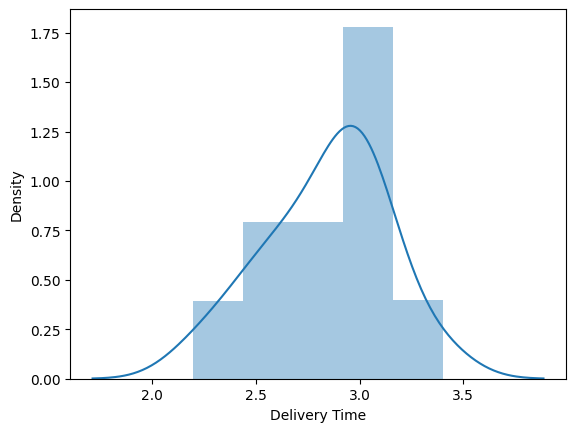

In [26]:
import seaborn as sns
sns.distplot(log_data['Delivery Time'])

<ipython-input-27-26a10210c552>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_data['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

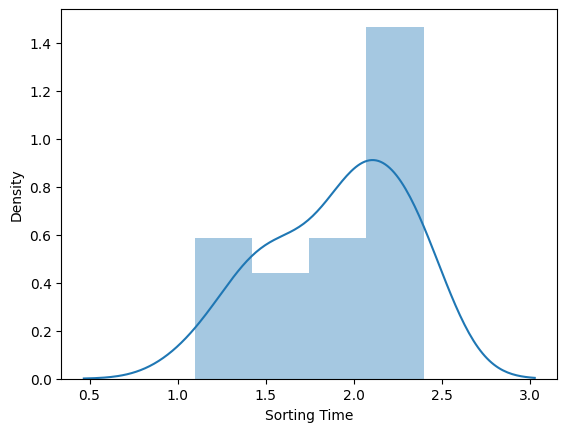

In [27]:
sns.distplot(log_data['Sorting Time'])

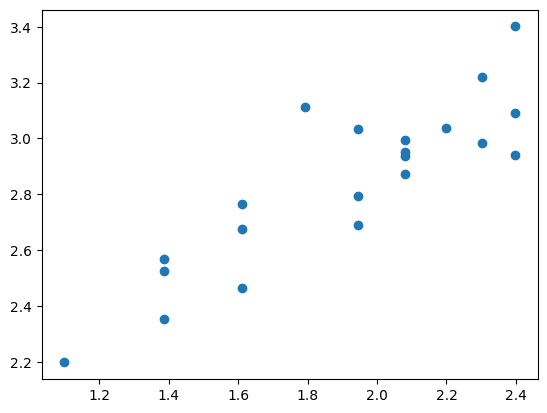

In [28]:
import matplotlib.pyplot as plt
plt.scatter(log_data['Sorting Time'],log_data['Delivery Time'])

From above distribution plot we can understand the skewness has been reduced when we do logarithmic transformations

In [29]:
log_data.rename(columns={'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},inplace=True)
log_data

,Delivery_Time,Sorting_Time
0,3.091042,2.397895
1,2.674149,1.609438
2,3.032546,1.945910
3,3.218876,2.302585
4,3.401197,2.397895
5,2.794228,1.945910
6,2.995732,2.079442
7,2.351375,1.386294
8,2.939162,2.397895
9,2.983153,2.302585


In [30]:
import statsmodels.formula.api as smf
model_log=smf.ols("Delivery_Time~Sorting_Time",data=log_data).fit()

In [31]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     61.08
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           2.37e-07
Time:                        06:11:06   Log-Likelihood:                 11.264
No. Observations:                  21   AIC:                            -18.53
Df Residuals:                      19   BIC:                            -16.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.5561      0.167      9.307      0.000       1.206       1.906
Sorting_Time     0.6725      0.086      7.816      0.000       0.492       0.853
==============================================================================
Omnibus:                        2.074   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.269
Skew:                           0.602   Prob(JB):                        0.530
Kurtosis:                       2.966   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
Rmse_log=np.sqrt(((model_log.resid)**2).mean())
Rmse_log

0.141518954356853

RSQUARED VALUE HAS BEEN IMPROVED AFTER TRANSFORMATION

2) SQUARE ROOT Tranformation

<ipython-input-33-627db6c284e6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sqrt1)


<Axes: xlabel='Delivery_Time', ylabel='Density'>

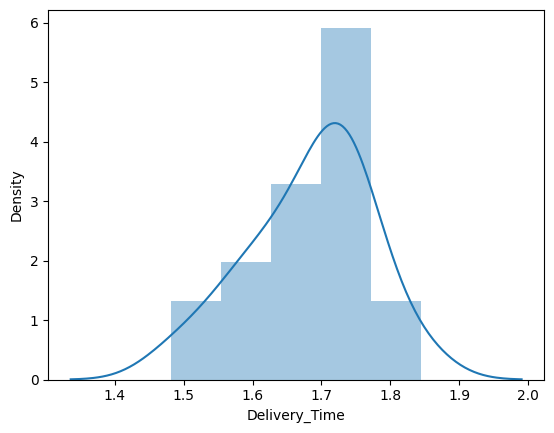

In [33]:
sqrt1=np.sqrt(log_data['Delivery_Time'])
sqrt2=np.sqrt(log_data['Sorting_Time'])
sns.distplot(sqrt1)

<ipython-input-34-91082ebd7ad0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sqrt2)


<Axes: xlabel='Sorting_Time', ylabel='Density'>

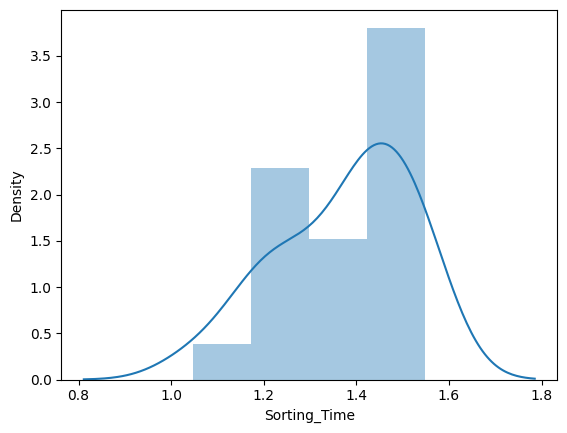

In [34]:
sns.distplot(sqrt2)

In [35]:
model_sqrt=smf.ols("sqrt1~sqrt2",data=log_data).fit()
RMSE_SQRT=np.sqrt(((model_sqrt.resid)**2).mean())
RMSE_SQRT

0.04111519706603904

3) SQUARE Tranformation

In [36]:
sqr1=(log_data['Delivery_Time']**2)
sqr2=(log_data['Sorting_Time']**2)

<ipython-input-37-1a9e3b8235c3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sqr1);


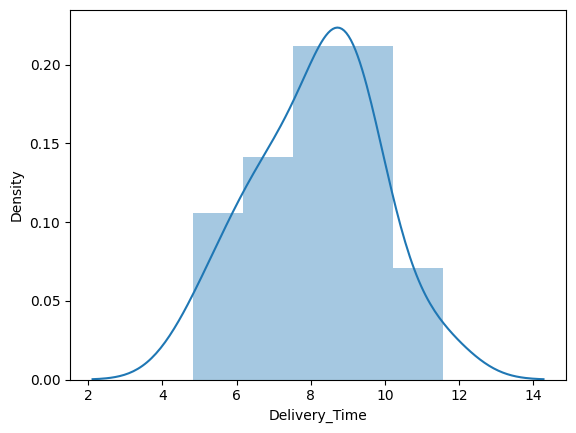

In [37]:
sns.distplot(sqr1);

<ipython-input-38-5bcca04c7cdd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sqr2);


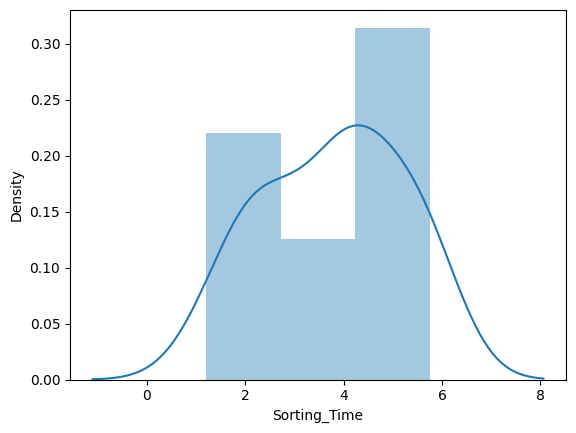

In [38]:
sns.distplot(sqr2);

In [39]:
model_sqr=smf.ols('sqr1~sqr2',data=log_data).fit()
RMSE_SQR=np.sqrt(((model_sqr.resid)**2).mean())
RMSE_SQR

0.8453411353194172